In [1]:
# Importing the Libraries
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread


In [2]:
# reading the channels of the images
img_i = imread('iband.gif')
img_b = imread('bband.gif')
img_g = imread('gband.gif')
img_r = imread('rband.gif')



# verifying the shapes
print("img_i : " + str(len(img_i)) + "," + str(len(img_i[0])))
print("img_b : " + str(len(img_b)) + "," + str(len(img_b[0])))
print("img_g : " + str(len(img_g)) + "," + str(len(img_g[0])))
print("img_r : " + str(len(img_r)) + "," + str(len(img_r[0])))

img_i : 512,512
img_b : 512,512
img_g : 512,512
img_r : 512,512


In [3]:
# Calculating no. of points lying on the river
img_y = plt.imread('op1.jpeg')
img_y = (img_y > (0.5*255)) * 1
river_points_population = np.sum(img_y==1)
print("No. of points on the river is: " + str(river_points_population))

No. of points on the river is: 9449


In [4]:
# Creating the river training class
img_y = img_y.flatten()
#Covering the river portion
cover_river = np.floor(np.random.rand(50) * river_points_population)    #Selecting in random distribution
# print(cover_river)
class_riv = []
j = 0
for i in range(512*512):
    if(img_y[i]==1):
        j+=1
        if j in cover_river:
            class_riv.append(i)
print(class_riv)

[8346, 15521, 17568, 20644, 22180, 27817, 28321, 35500, 45752, 55470, 62641, 69282, 74418, 84132, 85161, 90785, 91292, 95392, 98975, 107686, 112306, 115381, 117950, 119991, 122042, 131261, 135373, 145107, 150750, 152800, 155862, 157909, 158436, 170194, 170716, 171211, 171233, 175325, 175821, 177351, 189127, 190661, 193721, 201406, 201912, 207036, 236723, 246438, 254610, 256148]


In [5]:
# Creating the non-river training class
non_river_points_population = np.sum(img_y==0)
print("No.  of points on non river portion is: " + str(non_river_points_population))
cover_non_river = np.floor(np.random.rand(100) * non_river_points_population)    #Selecting in rnon_river_points_poandom distribution
# print(cover_non_river)
class_non_riv = []
j=0
for i in range(512*512):
    if(img_y[i] == 0):
        j+=1
        if j in cover_non_river:
            class_non_riv.append(i)
print(class_non_riv)         


No.  of points on non river portion is: 252695
[359, 974, 6334, 9265, 12549, 14222, 14676, 15766, 16622, 18457, 20618, 22417, 24467, 25134, 25854, 26486, 27029, 31806, 43758, 43847, 46579, 48424, 52591, 55028, 57145, 64583, 67282, 67901, 68360, 69473, 73285, 75676, 76015, 76497, 78119, 86067, 88911, 94380, 98820, 103091, 107559, 109270, 109604, 117766, 120290, 121101, 127947, 130425, 130634, 132634, 145869, 147342, 155082, 156447, 158473, 162285, 166714, 171772, 171842, 172947, 175793, 177125, 177135, 179711, 181395, 186440, 188055, 190457, 190557, 191921, 198881, 201427, 201938, 202149, 202615, 204455, 204832, 205475, 206292, 211310, 215288, 234408, 234789, 235993, 236433, 240199, 241815, 242667, 244797, 245430, 246026, 246054, 246419, 248561, 248839, 249213, 253800, 253838, 256898, 258993]


(512, 512, 4)
[44.04 29.94 31.38 21.12] [40.59 25.5  26.21 34.12]


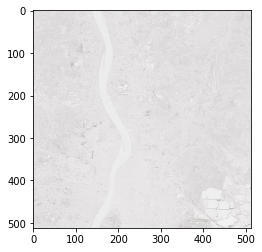

In [6]:
# Finding the means of the channels rgb values
test_data = np.dstack((img_r, img_g, img_b, img_i))
test_cpy = test_data
print(test_data.shape)
plt.imshow(test_data)
test_data = test_data.reshape(-1, 4)
river_mean = np.mean(test_data[class_riv], axis=0)
non_river_mean = np.mean(test_data[class_non_riv], axis=0)
print(river_mean, non_river_mean)


In [7]:
# Finding the covariance matrices
test_data = test_data.reshape(-1,4)
covariance_riv = np.cov(test_data[class_riv].T)
covariance_non_riv = np.cov(test_data[class_non_riv].T)
print(covariance_riv)
print(covariance_non_riv)
print(covariance_riv.shape, covariance_non_riv.shape)

[[ 0.81469388  0.47183673  0.24979592 -0.18857143]
 [ 0.47183673  0.75142857  0.37020408 -0.21714286]
 [ 0.24979592  0.37020408  0.73020408 -0.23020408]
 [-0.18857143 -0.21714286 -0.23020408  0.80163265]]
[[ 6.22414141  4.95454545  6.65262626  1.43353535]
 [ 4.95454545  4.91919192  6.63131313  3.74747475]
 [ 6.65262626  6.63131313 12.28878788  3.13616162]
 [ 1.43353535  3.74747475  3.13616162 38.95515152]]
(4, 4) (4, 4)


In [8]:
# Generating the river predicted class
riv_1 = np.zeros(512*512)
for i in range(512*512):
    riv_1[i] = (test_data[i] - river_mean).T@np.linalg.inv(covariance_riv)@(test_data[i] - river_mean)
len(riv_1)


262144

In [9]:
# Generating the non-river predicted class
non_riv_1 = np.zeros(512*512)
for i in range(512*512):
    non_riv_1[i] = (test_data[i] - non_river_mean).T@np.linalg.inv(covariance_non_riv)@(test_data[i] - non_river_mean)
len(non_riv_1)    

262144

In [10]:
# Probability multivariate definition of river class
p1 = ((1/np.sqrt(2*3.14159))**(50))*(1/np.sqrt(np.linalg.det(covariance_riv)))*np.exp((-1/2)*riv_1)
print(p1)
p1.shape

[7.58987348e-141 2.81938284e-131 4.61792434e-118 ... 6.92690094e-061
 6.39314913e-077 2.95474880e-065]


(262144,)

In [11]:
# Probability multivariate definition of non-river class
p2 = ((1/np.sqrt(2*3.14159))**100)*(1/np.sqrt(np.linalg.det(covariance_non_riv)))*np.exp((-1/2)*non_riv_1)
print(p2)
p2.shape

[9.41096243e-43 1.68831439e-42 7.24527884e-43 ... 4.37438484e-43
 2.33636152e-43 1.70187078e-43]


(262144,)

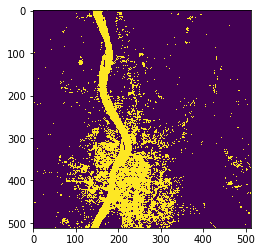

In [12]:

# GENERATING THE RESULTS
# P1 = 0.3, P2 = 0.7
op = []
P1 = 0.3
P2 = 0.7
op = (P1*p1>=P2*p2)*255
op = op.reshape(512,512)
plt.imshow(op)

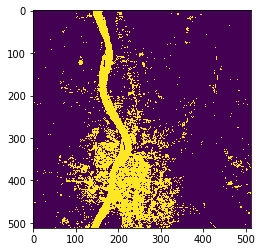

In [13]:
# P1 = P2 = 0.5
op = []
P1 = 0.5
P2 = 0.5
op = (P1*p1>=P2*p2)*255
op = op.reshape(512,512)
plt.imshow(op)


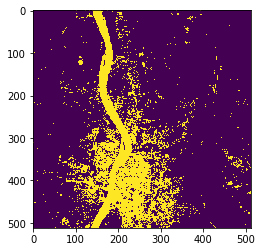

In [14]:
# P1 = 0.7, P2 = 0.3
op = []
P1 = 0.7
P2 = 0.3
op = (P1*p1>=P2*p2)*255
op = op.reshape(512,512)
plt.imshow(op)